In [1]:
import numpy as np
import pandas as pd

In [2]:
np.random.seed(5)

df = pd.DataFrame({
    "day": pd.date_range("2024-01-01", periods=500),
    "units_sold": np.random.randint(1, 60, 500),
    "price": np.random.randint(100, 1000, 500),
    "customer_rating": np.random.uniform(1, 5, 500)
})

In [3]:
df

,day,units_sold,price,customer_rating
0,2024-01-01,36,945,2.284716
1,2024-01-02,15,773,1.865399
2,2024-01-03,48,676,1.699030
3,2024-01-04,39,999,3.207362
4,2024-01-05,55,450,3.558515
...,...,...,...,...
495,2025-05-10,14,705,1.477246
496,2025-05-11,52,375,2.003696
497,2025-05-12,10,843,4.988959
498,2025-05-13,42,732,4.898006


1. Inspection of Dataset

In [4]:
df.shape
df.columns
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   day              500 non-null    datetime64[ns]
 1   units_sold       500 non-null    int64         
 2   price            500 non-null    int64         
 3   customer_rating  500 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 15.8 KB


,day,units_sold,price,customer_rating
count,500,500.000000,500.000000,500.000000
mean,2024-09-06 12:00:00,28.440000,528.916000,2.961798
min,2024-01-01 00:00:00,1.000000,101.000000,1.004692
25%,2024-05-04 18:00:00,14.000000,293.250000,2.026971
50%,2024-09-06 12:00:00,28.000000,519.000000,3.023700
75%,2025-01-09 06:00:00,43.000000,747.000000,3.814543
max,2025-05-14 00:00:00,59.000000,999.000000,4.988959
std,NaN,17.017332,262.351905,1.118583


2. Statistical Analysis

In [12]:
df['units_sold'].mean()


np.float64(28.44)

In [14]:
df['units_sold'].median()


28.0

In [15]:
df['units_sold'].std()


17.017331728514808

In [16]:
df['units_sold'].min()


1

In [17]:
df['units_sold'].max()

59

3. Filtering

In [30]:
good_customers=df[(df['customer_rating']>4)&(df['price']>400)].count()

In [31]:
good_customers

,0
day,60
units_sold,60
price,60
customer_rating,60


4. Ranking

In [36]:
df["customer_rank"] = df["customer_rating"].rank(ascending=False)

In [37]:
df

,day,units_sold,price,customer_rating,customer_rank
0,2024-01-01,36,945,2.284716,349.0
1,2024-01-02,15,773,1.865399,392.0
2,2024-01-03,48,676,1.699030,406.0
3,2024-01-04,39,999,3.207362,214.0
4,2024-01-05,55,450,3.558515,166.0
...,...,...,...,...,...
495,2025-05-10,14,705,1.477246,437.0
496,2025-05-11,52,375,2.003696,378.0
497,2025-05-12,10,843,4.988959,1.0
498,2025-05-13,42,732,4.898006,8.0


5. **Sorting**

In [40]:
df.sort_values(by='price',ascending=False)

,day,units_sold,price,customer_rating,customer_rank
3,2024-01-04,39,999,3.207362,214.0
239,2024-08-27,50,998,2.029052,375.0
477,2025-04-22,54,996,2.402540,335.0
242,2024-08-30,52,995,2.621890,303.0
193,2024-07-12,3,995,2.704222,290.0
...,...,...,...,...,...
127,2024-05-07,57,110,3.859044,123.0
153,2024-06-02,5,106,4.933830,5.0
488,2025-05-03,43,104,1.268453,466.0
171,2024-06-20,20,102,2.820982,275.0


# **Visualization**

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

1. Pairplot

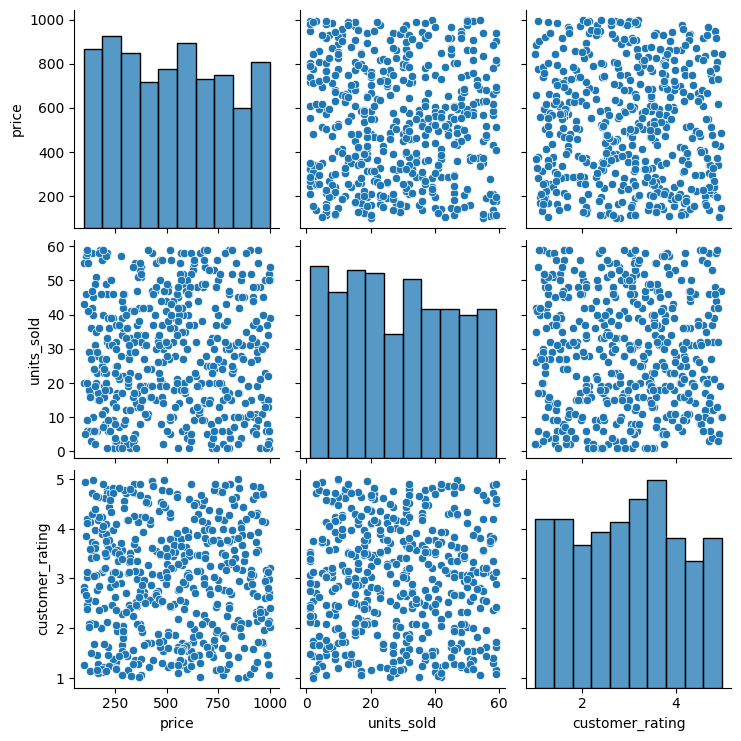

In [42]:
sns.pairplot(df[["price", "units_sold", "customer_rating"]])
plt.show()

2. Histogram

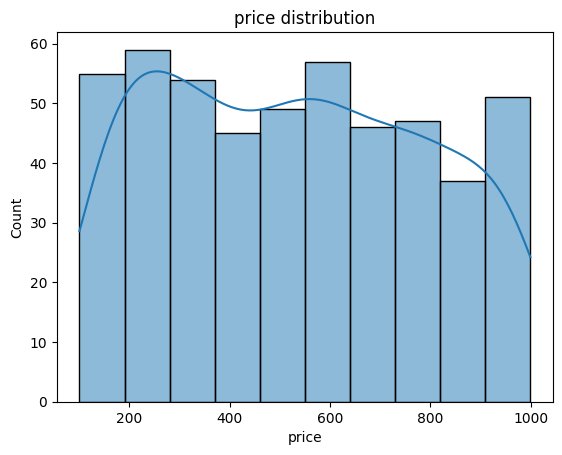

In [52]:
sns.histplot(df["price"], kde=True)
plt.title("price distribution")
plt.show()

3. Scatterplot

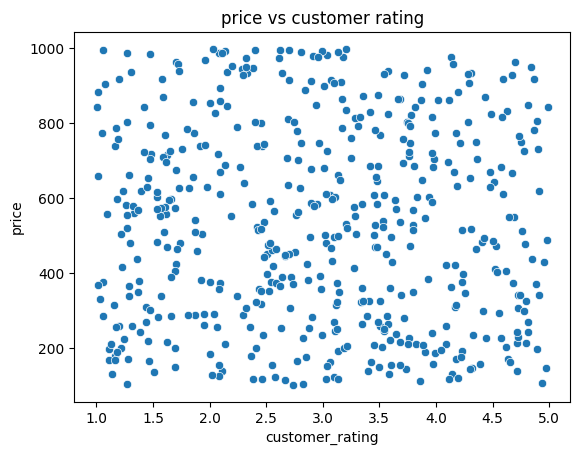

In [44]:
sns.scatterplot(x="customer_rating", y="price", data=df)
plt.title("price vs customer rating")
plt.show()

4. Barplot

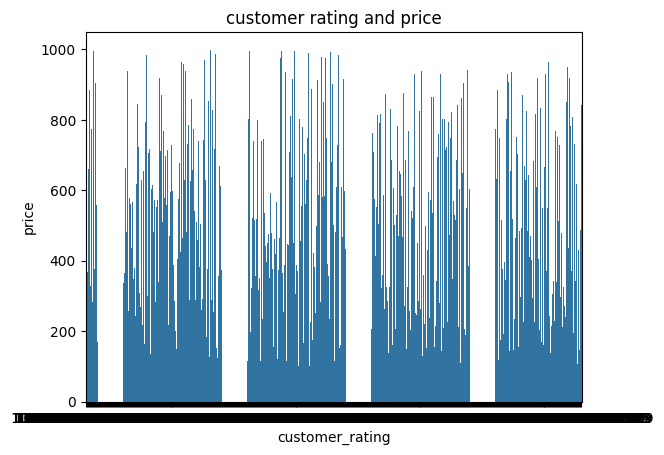

In [50]:
sns.barplot(x="customer_rating", y="price", data=df)
plt.title("customer rating and price")
plt.show()

5. Heat map

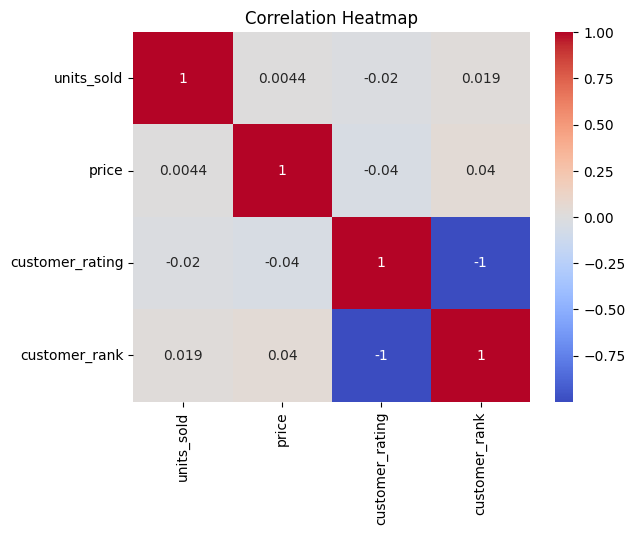

In [51]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()